<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/HA_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 6.4 MB/s eta 0:00:00


In [2]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback, ss
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

1001


<ipython-input-4-2d8e34216d65>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplt[i] = y


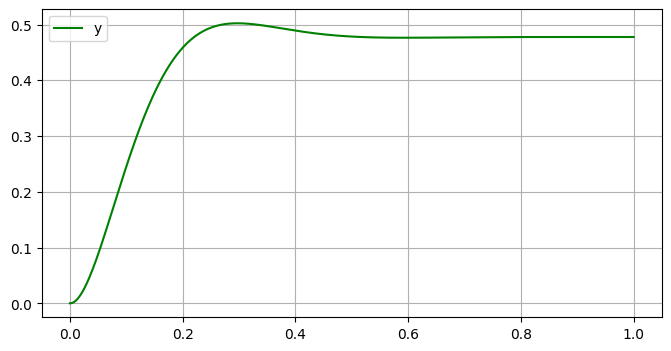

In [4]:
# Define your plant in state space in cascade form:
A = np.array([[0, 1, 0],[0, 0, 1],[0, -36, -15]])
B = np.array([[0],[0],[1]])
C = np.array([1000, 100, 0])
D = np.array([0])
K = np.array([2094, 373.1, 14.97])              #Kz   row vector

"""
A = np.array([[0, 1],[-3, 5]])
B = np.array([[0],[1]])
C = np.array([1, 0])
D = np.array([0])
K = np.array([180.1, 11])
L = np.array([[155],[1053]])
"""
x = np.array([[0],[0],[0]])#np.zeros((A.shape[0], 1))
u = 0
r = 1

# simulate
t0 = 0
t1 = 1           # remeber that Ts is 1 sec
dt = 0.001
nt = int( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)


#print(x.reshape(-1,1))
print(t.shape[0])
rplt = np.zeros(t.shape[0])
yplt = np.zeros(t.shape[0])

for i in range(t.shape[0]):
  # model
  xdot = np.dot(A, x) + B * u        #state equation
  x = x + xdot * dt
  y = np.dot(C,x)+ D * u             # output equation

  u = r - np.dot(K,x)

  yplt[i] = y
  rplt[i] = r

# plot results
plt.figure(figsize=(8, 4))
plt.plot(t, yplt, 'green')
#plt.ylim(0, 0.002)
plt.grid()
plt.legend(['y'])
plt.show()

Eigenvalues (Roots) of A: [-20.+0.j          -4.+5.45893763j  -4.-5.45893763j]
Eigenvalues (Roots) of A: [-399.99366398 +0.j         -40.00316801+54.5684805j
  -40.00316801-54.5684805j]


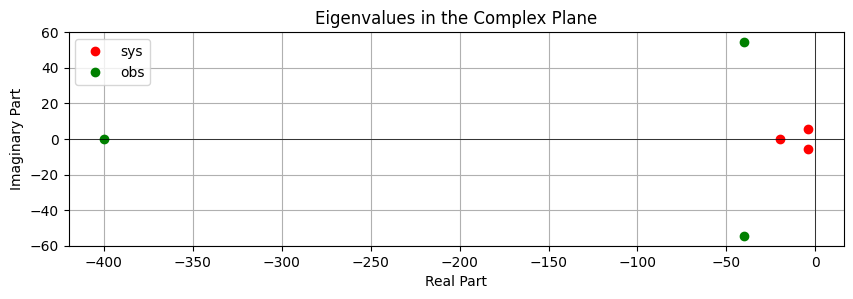

In [ ]:
# plot roots (eigenvalues) of the system matrix of controlled system and observer
sys_eigenvalues, _ = np.linalg.eig(A-np.outer(B, K))

print("Eigenvalues (Roots) of A:", sys_eigenvalues)

obs_eigenvalues, _ = np.linalg.eig(A-np.outer(L, C))

print("Eigenvalues (Roots) of A:", obs_eigenvalues)

plt.figure(figsize=(10, 6))
# Plot the real part vs. the imaginary part of the eigenvalues
plt.plot(sys_eigenvalues.real, sys_eigenvalues.imag, 'ro')  # 'ro' plots red dots
plt.plot(obs_eigenvalues.real, obs_eigenvalues.imag, 'go')  # 'ro' plots red dots

# Add grid, labels, and make sure the aspect ratio is equal
plt.grid(True)
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues in the Complex Plane')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(['sys','obs'])

# Show the plot
plt.show()
